<a href="https://colab.research.google.com/github/KacioSilva/ProjetoAM/blob/main/Prova_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação da Disciplina de Aprendizado de Máquina - 1° Unidade;
Equipe: Kácio Silva, Luciano Bruno e Tyago Ferreira.

# Carregando o conjunto de dados usando a biblioteca Pandas

In [73]:
import pandas as pd
import numpy as np

In [74]:
url = 'https://raw.githubusercontent.com/KacioSilva/ProjetoAM/main/parkinsons_updrs.csv'
df = pd.read_csv(url)

#Leitura, análise e tratamento inicial do dataset

In [ ]:
df.head(15)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


Inicialmente, percebe-se que há colunas que não farão diferenças para o nosso conjunto de dados. Nesse caso, removeremos a coluna Subject#, pois indica somente um identificador do usuário.

Além disso, é importante notar que a coluna test_time representa a quantidade de dias como um valor contínuo, o que não é interessante. Para isso, transformaremos o valor contínuo em discreto.

In [75]:
df = df.drop('subject#', axis=1)
df['test_time'] = df['test_time'].round(0)
df.head(15)

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,6.0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,13.0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,20.0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,26.0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,34.0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,72,0,41.0,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,72,0,48.0,29.682,37.363,0.00422,0.000024,0.00212,0.00221,0.00637,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,72,0,55.0,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,72,0,62.0,30.177,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,72,0,69.0,30.424,38.849,0.00496,0.000027,0.00258,0.00253,0.00773,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


Utilizamos o método describe para verificar medidas estatísticas das nossas colunas NUMÉRICAS. Para isso, precisamos eliminar, do método, a coluna sex.

Nesse caso, foi verificado que possuímos inconsistências na coluna test_time, pois o valor inteiro indica a quantidade em dias e não pode assumir valores negativos.

In [76]:
df.drop('sex', axis=1).describe()

,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,92.789957,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,8.821524,53.459124,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,36.000000,-4.000000,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,47.000000,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,92.000000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,138.000000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,215.000000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Removendo os valores negativos da coluna test_time e transformando os valores contínuos em discretos.

In [77]:
df = df[df['test_time'] >= 0]

df.drop('sex', axis=1).describe()

,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,64.814771,92.987037,21.289655,29.014090,0.006156,0.000044,0.002988,0.003278,0.008965,0.034038,0.311012,0.017157,0.020149,0.027489,0.051470,0.032126,21.679527,0.541423,0.653252,0.219618
std,8.827750,53.335812,8.133419,10.709966,0.005628,0.000036,0.003126,0.003734,0.009378,0.025836,0.230310,0.013237,0.016672,0.020002,0.039710,0.059735,4.292521,0.101024,0.070955,0.091494
min,36.000000,0.000000,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,47.000000,15.000000,21.362000,0.003580,0.000022,0.001580,0.001825,0.004730,0.019110,0.175000,0.009280,0.010790,0.015660,0.027830,0.010953,19.404000,0.469695,0.596100,0.156385
50%,65.000000,92.000000,20.871000,27.522000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027530,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.917000,0.542250,0.643550,0.205560
75%,72.000000,138.000000,27.594000,36.400500,0.006800,0.000053,0.003290,0.003470,0.009880,0.039775,0.365000,0.020605,0.023775,0.032725,0.061805,0.031464,24.445500,0.614045,0.711480,0.264590
max,85.000000,215.000000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Nesse momento, é interessante visualizar se a base de dados possui valores ausentes para que possam ser tratados. Como é possível visualizar, não é possível encontrar valores ausentes na base de dados.

In [ ]:
df.isnull().sum()

age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

É importante também verificar quantos valores únicos possuímos por cada coluna. Essa etapa é importante pois quanto mais valores únicos por coluna possuirmos, menos satisfatório pode ser o resultado do meu modelo a ser utilizado futuramente.
Feita essa análise, percebe-se que as colunas precisam de tratamento em relação a variedade de valores únicos

In [ ]:
df.nunique()

age                23
sex                 2
test_time         199
motor_UPDRS      1078
total_UPDRS      1125
Jitter(%)        1304
Jitter(Abs)      4103
Jitter:RAP        853
Jitter:PPQ5       840
Jitter:DDP       1703
Shimmer          3577
Shimmer(dB)       851
Shimmer:APQ3     2661
Shimmer:APQ5     2848
Shimmer:APQ11    3283
Shimmer:DDA      4219
NHR              5520
HNR              4772
RPDE             5419
DFA              5272
PPE              4770
dtype: int64

Verificamos também que não possuímos dados duplicados em nossa base de dados. Como foi possível perceber, não há dados duplicados.

In [ ]:
duplicatas = df[df.duplicated(keep=False)]

if not duplicatas.empty:
    print("Valores duplicados encontrados:")
    print(duplicatas)
else:
    print("Nenhuma duplicata encontrada.")

Nenhuma duplicata encontrada.


Utilizaremos como coluna alvo total_UPDRS.

Para dar início a discretização dos dados da coluna total_UPDRS, precisaremos saber quais são os valores mínimo e máximo desta coluna para podermos distribuir em intervalos.

In [78]:
valor_minimo = df['total_UPDRS'].min()
valor_maximo = df['total_UPDRS'].max()

print(f"Valor mínimo na coluna 'total_updrs': {valor_minimo}")
print(f"Valor máximo na coluna 'total_updrs': {valor_maximo}")

Valor mínimo na coluna 'total_updrs': 7.0
Valor máximo na coluna 'total_updrs': 54.992


precisaremos discretizar a coluna alvo dividindo os valores em faixas.

OBS: Como não somos especialistas na área de saúde, não conseguimos definir até que ponto a pontuação é considerada baixa, média e alta. Para isso, distribuímos o conjunto de valor em valores arbritrários, apenas para fim representativo.

In [84]:
import pandas as pd

bins = [0, 10, 20, 30, 40, 55]

#labels = ['baixissimo', 'baixo', 'médio', 'alto', 'altissimo']
labels = [0, 1, 2, 3, 4]

df['total_UPDRS_discretizada'] = pd.cut(df['total_UPDRS'], bins=bins, labels=labels)

print(df['total_UPDRS_discretizada'])

0       3
1       3
2       3
3       3
4       3
       ..
5870    3
5871    3
5872    3
5873    3
5874    3
Name: total_UPDRS_discretizada, Length: 5863, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]


Para utilizarmos a nova coluna na matriz de correlação, deveremos transformar os valores da nova coluna para inteiro. Como foi verificado, ela está como categoty.

In [85]:
df.dtypes

age                            int64
sex                            int64
test_time                    float64
motor_UPDRS                  float64
total_UPDRS                  float64
Jitter(%)                    float64
Jitter(Abs)                  float64
Jitter:RAP                   float64
Jitter:PPQ5                  float64
Jitter:DDP                   float64
Shimmer                      float64
Shimmer(dB)                  float64
Shimmer:APQ3                 float64
Shimmer:APQ5                 float64
Shimmer:APQ11                float64
Shimmer:DDA                  float64
NHR                          float64
HNR                          float64
RPDE                         float64
DFA                          float64
PPE                          float64
total_UPDRS_discretizada    category
dtype: object

transformando o valor category para int64

In [86]:
df['total_UPDRS_discretizada'] = df['total_UPDRS_discretizada'].astype('int64')
df.dtypes

age                           int64
sex                           int64
test_time                   float64
motor_UPDRS                 float64
total_UPDRS                 float64
Jitter(%)                   float64
Jitter(Abs)                 float64
Jitter:RAP                  float64
Jitter:PPQ5                 float64
Jitter:DDP                  float64
Shimmer                     float64
Shimmer(dB)                 float64
Shimmer:APQ3                float64
Shimmer:APQ5                float64
Shimmer:APQ11               float64
Shimmer:DDA                 float64
NHR                         float64
HNR                         float64
RPDE                        float64
DFA                         float64
PPE                         float64
total_UPDRS_discretizada      int64
dtype: object

Nesse trecho, achamos por necessário visualizar quais dados têm uma correlação tanto forte positiva ou forte negativa. No caso, é importante para que no futuro possamos utilizar as variáveis certas como preditivas de acordo com a saída desejada.

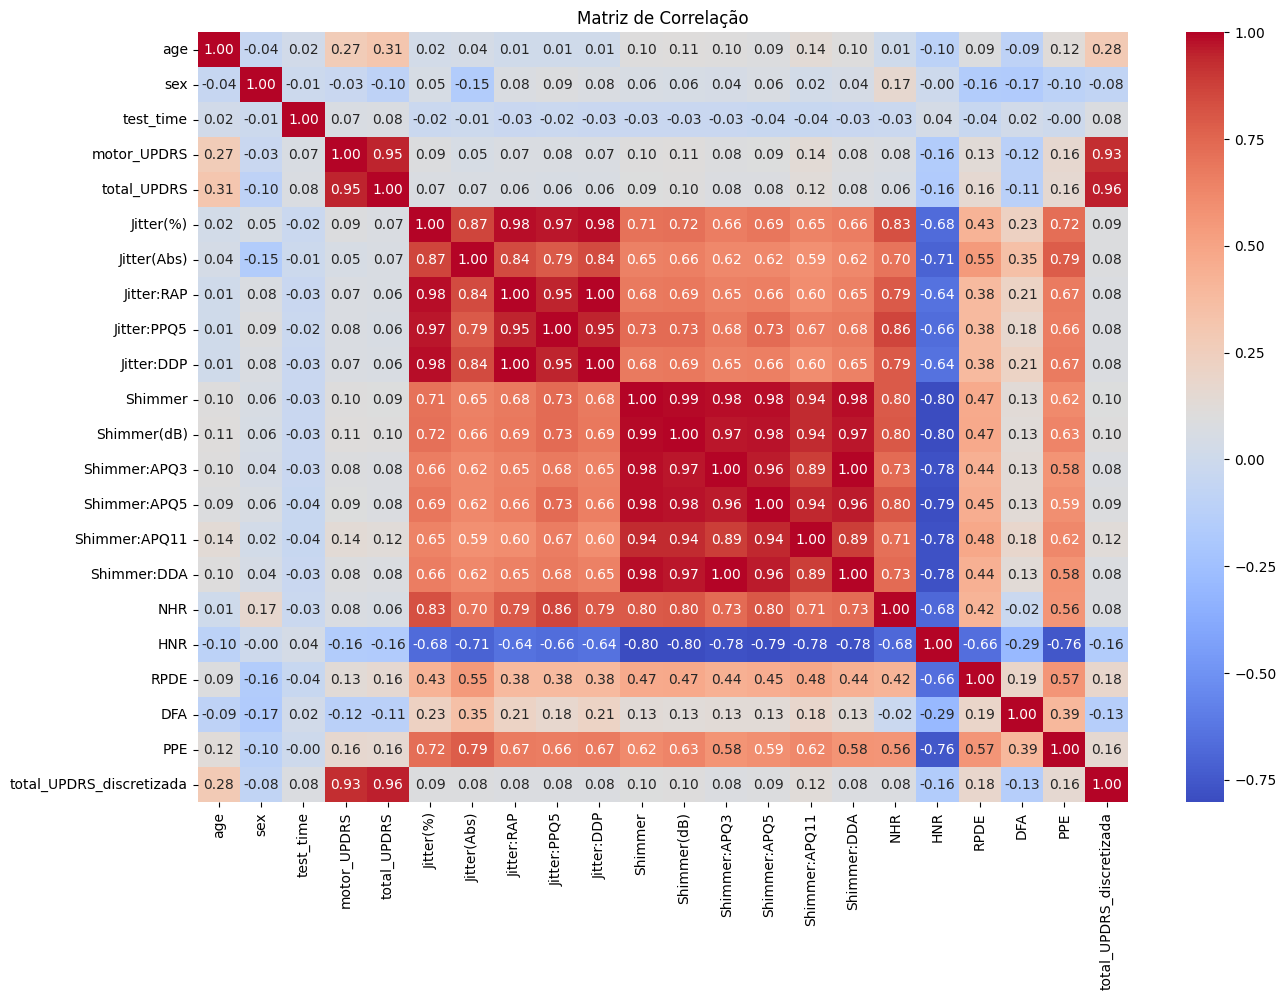

In [87]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Como as colunas motor_UPDRS e total_UPDRS possuem uma forte correlação com a minha coluna alvo (total_UPDRS_discretizada), foi necessário removê-las.

In [88]:
df.drop(columns=['motor_UPDRS', 'total_UPDRS'], inplace=True)
print(df)

      age  sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0      72    0        6.0    0.00662     0.000034     0.00401      0.00317   
1      72    0       13.0    0.00300     0.000017     0.00132      0.00150   
2      72    0       20.0    0.00481     0.000025     0.00205      0.00208   
3      72    0       26.0    0.00528     0.000027     0.00191      0.00264   
4      72    0       34.0    0.00335     0.000020     0.00093      0.00130   
...   ...  ...        ...        ...          ...         ...          ...   
5870   61    0      143.0    0.00406     0.000031     0.00167      0.00168   
5871   61    0      150.0    0.00297     0.000025     0.00119      0.00147   
5872   61    0      157.0    0.00349     0.000025     0.00152      0.00187   
5873   61    0      164.0    0.00281     0.000020     0.00128      0.00151   
5874   61    0      171.0    0.00282     0.000021     0.00135      0.00166   

      Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:A

# AGE
Análise inicial da coluna de IDADE.

Percebe-se que há uma grande variação. Nota-se também que a maior parte da amostra está entre 60 e 80 anos.

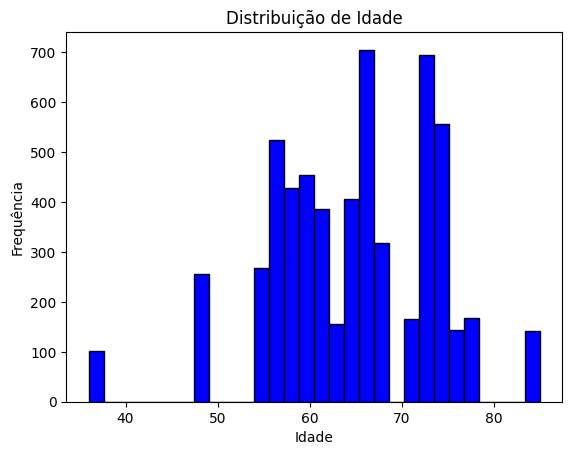

In [ ]:
import matplotlib.pyplot as plt

idade = df['age']

plt.hist(idade, bins=30, color='b', edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# SEX
Análise Inicial da coluna de Sexo.

 Percebe-se que a maioria da minha amostra são de pacientes do sexo MASCULINO.

Text(0.5, 1.0, 'Distribuição do sexo')

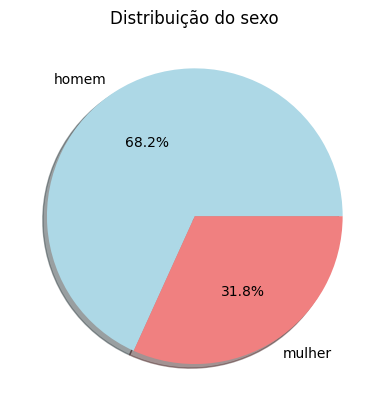

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

colunaSexo = df['sex'].value_counts()
cores = ['lightblue', 'lightcoral']
labels = ['homem', 'mulher']

plt.pie(colunaSexo, colors=cores, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição do sexo')

# test_time
Para a visualização da coluna test_time, foi utilizado o gráfico do tipo boxplot pois ele é ideal para analisar a distribuição de valores na faixa de tempo com um grande volume de informações.

As informações tiradas desse gráfico são que não possuímos outliers nessa coluna, além de que os dados estão bem distribuídos entre o primeiro quartil, mediana e terceiro quartil.

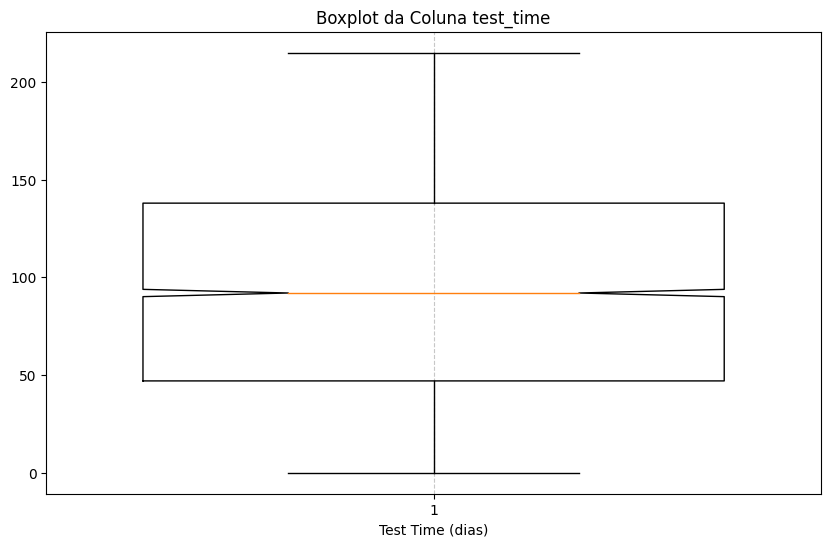

In [ ]:
import pandas as pd

# Criando um histograma
plt.figure(figsize=(10, 6))
plt.xlabel('Test Time (dias)')
plt.title('Boxplot da Coluna test_time')

plt.boxplot(df['test_time'], sym='gx', widths=.75, notch=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

#total_UPDRS_discretizada
Análise inicial da coluna total_UPDRS_discretizada.



Seguido esses passos, é interessante visualizar como ficou a distribuição dos dados em categorias.

Text(0.5, 1.0, 'Total_UPDRS')

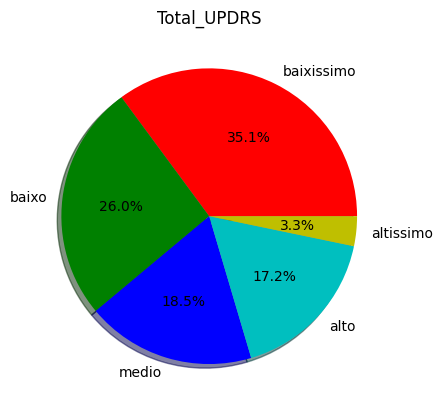

In [71]:
colunaTotalUPDRS = df['total_UPDRS_discretizada'].value_counts()
cores = ['r', 'g', 'b', 'c', 'y']
labels = ['baixissimo', 'baixo','medio','alto','altissimo']


plt.pie(colunaTotalUPDRS, colors=cores, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Total_UPDRS")

Gráfico de correlação entre as colunas 'total_UPDRS' e 'age' para que seja identificada a faixa etária em que o parkinson tem a maior gravidade com base na média de idade dos indivíduos


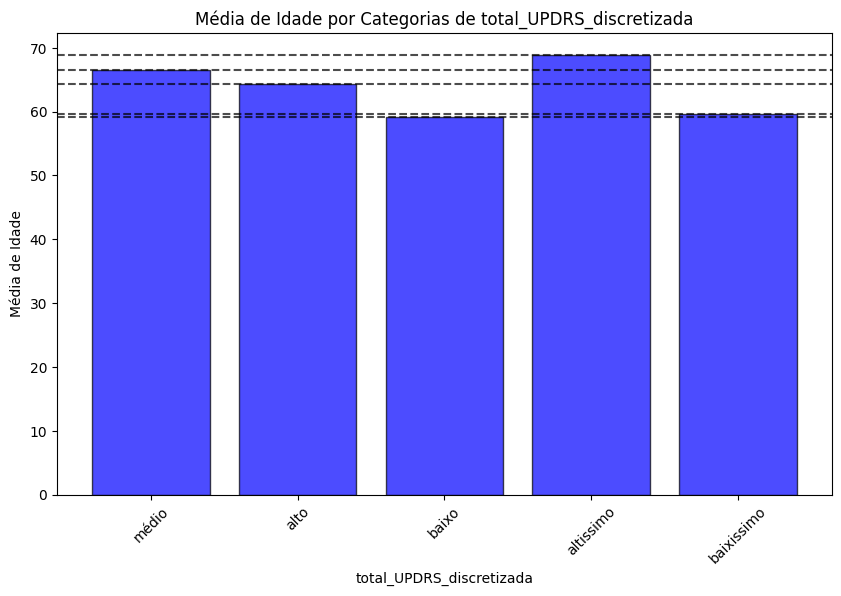

In [ ]:
import matplotlib.pyplot as plt

contagem = df['total_UPDRS_discretizada'].value_counts()

categorias = contagem.index

alturas = [df[df['total_UPDRS_discretizada'] == cat]['age'].mean() for cat in categorias]

plt.figure(figsize=(10, 6))
plt.bar(categorias, alturas, color='b', alpha=0.7,  edgecolor='black')
plt.title('Média de Idade por Categorias de total_UPDRS_discretizada')
plt.xlabel('total_UPDRS_discretizada')
plt.ylabel('Média de Idade')
plt.xticks(rotation=45)

for altura in alturas:
    plt.axhline(y=altura, color='black', linestyle='--', alpha=0.7)

plt.show()

#Jitter(%)
O gráfico de histograma mostra a distribuição da medida de Jitter em porcentagem. A maioria dos valores de Jitter está concentrada em torno de um valor central, com uma cauda mais longa à direita. Isso indica que a maioria das medições tem baixa variação na frequência fundamental, mas algumas medições apresentam uma variação significativamente maior.

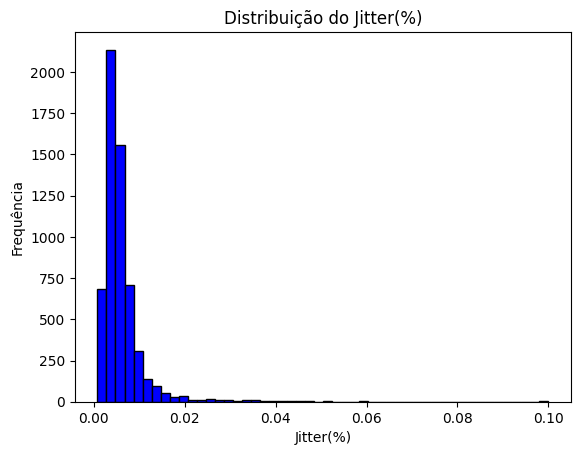

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Jitter(%)'], bins=50, color='blue', edgecolor='black')
plt.title('Distribuição do Jitter(%)')
plt.xlabel('Jitter(%)')
plt.ylabel('Frequência')
plt.show()

#Jitter(Abs)
O gráfico de histograma representa a distribuição da medida Jitter em valores absolutos(Abs). Assim como no caso anterior, a maioria dos valores de Jitter está concentrada em torno de um valor central, mas existem algumas medições com valores absolutos mais altos, indicando variações maiores na frequência fundamental.

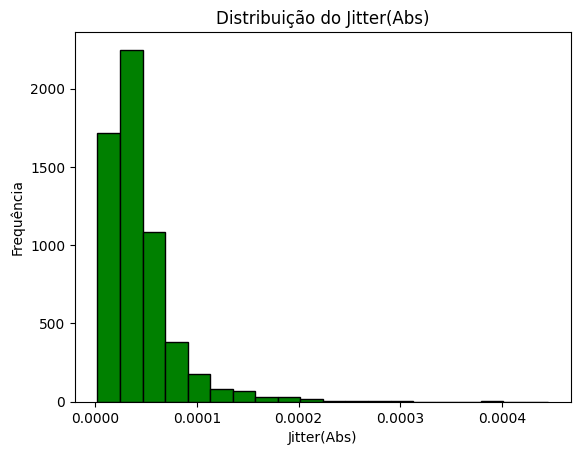

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Jitter(Abs)'], bins=20, color='green', edgecolor='black')
plt.title('Distribuição do Jitter(Abs)')
plt.xlabel('Jitter(Abs)')
plt.ylabel('Frequência')
plt.show()


#Jitter:RAP
O histograma mostra a distribuição da taxa de Jitter absoluta (Jitter:RAP). A maioria das medições possui uma taxa de Jitter baixa, mas há algumas medições com taxas de Jitter absolutas mais elevadas. Isso sugere que a maioria das amostras de voz é estável em relação à variação na frequência fundamental, mas algumas podem ter variações rápidas.

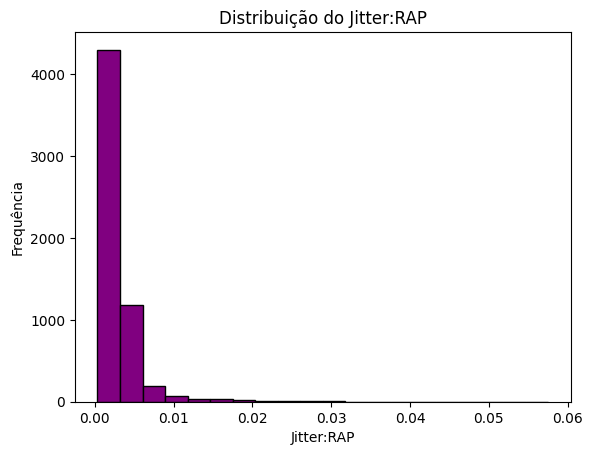

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Jitter:RAP'], bins=20, color='purple', edgecolor='black')
plt.title('Distribuição do Jitter:RAP')
plt.xlabel('Jitter:RAP')
plt.ylabel('Frequência')
plt.show()


#Jitter:PPQ5
O gráfico de histograma representa a distribuição da medida Jitter:PPQ5 (Jitter pertinente a períodos de curta duração), que se concentra principalmente em valores baixos. Isso sugere que a maioria das amostras de voz possui pouca variação na frequência fundamental em relação a períodos de curta duração, embora haja algumas amostras com valores mais elevados.

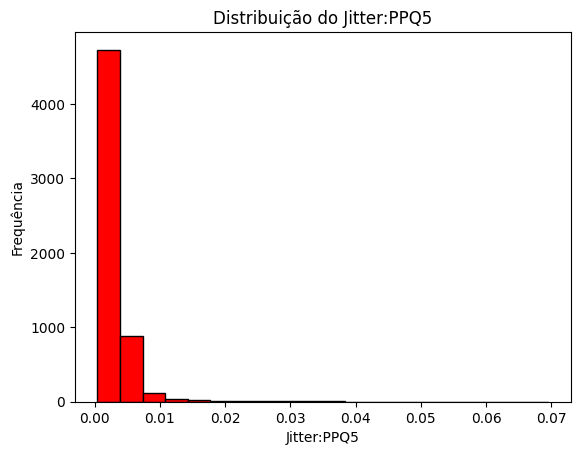

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Jitter:PPQ5'], bins=20, color='red', edgecolor='black')
plt.title('Distribuição do Jitter:PPQ5')
plt.xlabel('Jitter:PPQ5')
plt.ylabel('Frequência')
plt.show()


#Jitter:DDP
O gráfico de histograma para Jitter:DDP (Taxa de Jitter absoluta - Diferença entre os ciclos) mostra a distribuição dessa medida. A maior parte das amostras tem valores baixos de Jitter:DDP, mas há algumas com valores mais elevados. Isso indica que a maioria das amostras tem variação limitada na frequência fundamental entre ciclos, mas algumas apresentam maior variação.

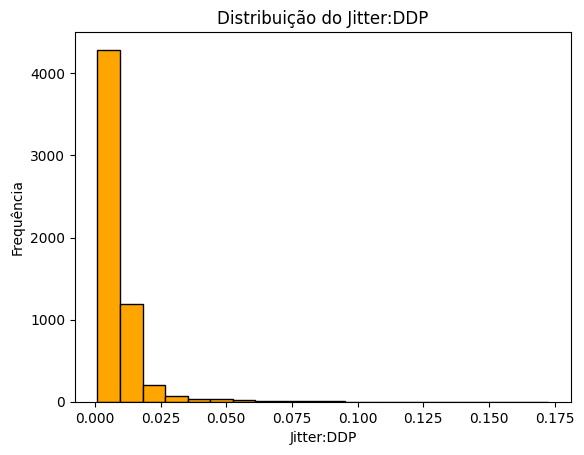

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Jitter:DDP'], bins=20, color='orange', edgecolor='black')
plt.title('Distribuição do Jitter:DDP')
plt.xlabel('Jitter:DDP')
plt.ylabel('Frequência')
plt.show()


#Shimmer
O boxplot exibe a distribuição do Shimmer. O Shimmer é uma métrica que quantifica a variação na amplitude da voz. Ele mostra a mediana, quartis, possíveis outliers e a variabilidade dos dados. A mediana representa a linha no meio da caixa, os quartis são as bordas da caixa e os outliers são os pontos fora das "cerquinhas". A maior parte das amostras tem baixa variação de amplitude (Shimmer), mas há alguns valores atípicos.

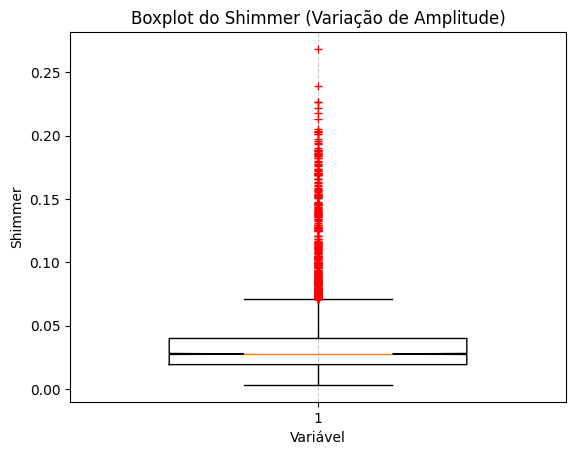

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Shimmer'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer (Variação de Amplitude)')
plt.xlabel('Variável')
plt.ylabel('Shimmer')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#ShimmerDB
O boxplot exibe a distribuição do Shimmer em decibéis. Da mesma forma, ele mostra a mediana, quartis, possíveis outliers e a variabilidade dos dados. A maioria das amostras possui baixa variação de amplitude em decibéis (Shimmer(dB)), mas há alguns valores atípicos.

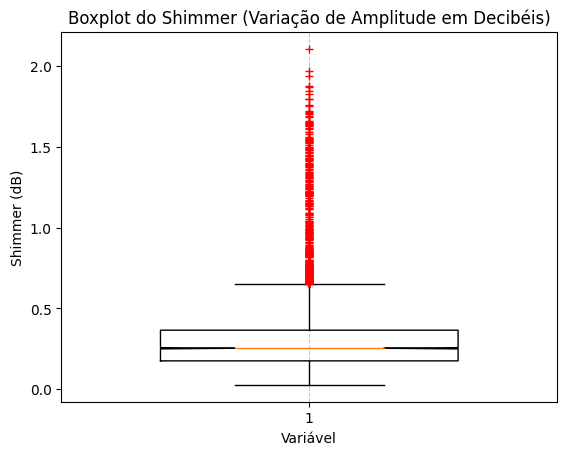

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Shimmer(dB)'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer (Variação de Amplitude em Decibéis)')
plt.xlabel('Variável')
plt.ylabel('Shimmer (dB)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#Shimmer:APQ3
O boxplot do Shimmer:APQ3 mostra a distribuição da variação de amplitude, com ênfase no terceiro quartil (Q3). A maioria das amostras tem baixa variação de amplitude, embora alguns valores atípicos sejam observados, indicando variações mais extremas em algumas amostras.

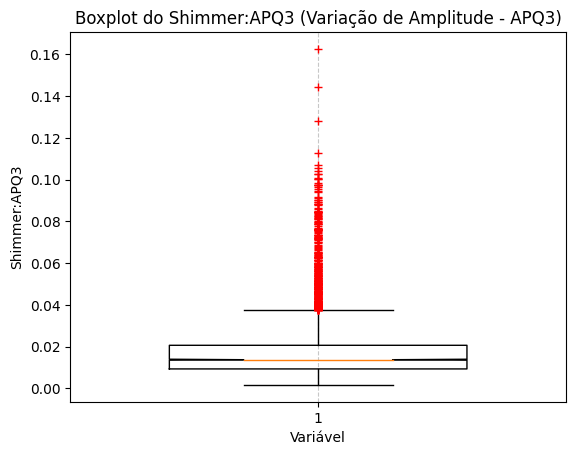

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Shimmer:APQ3'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:APQ3 (Variação de Amplitude - APQ3)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:APQ3')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



#Shimmer:APQ5
O boxplot exibe a distribuição do Shimmer:APQ5. Ele mostra a mediana, quartis, possíveis outliers e a variabilidade dos dados. A maioria das amostras possui baixa variação de amplitude em relação ao Shimmer:APQ5, embora haja alguns valores atípicos.

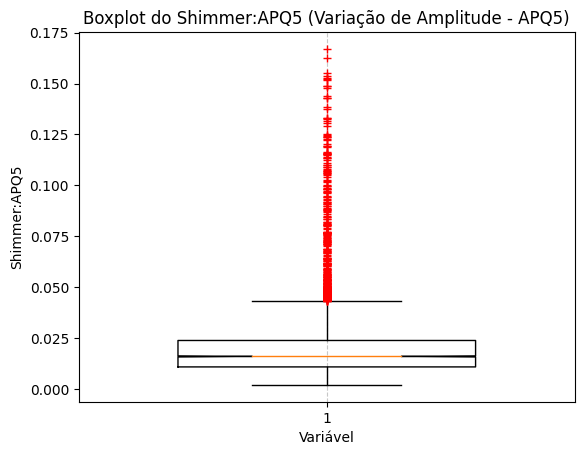

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Shimmer:APQ5'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:APQ5 (Variação de Amplitude - APQ5)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:APQ5')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#Shimmer:APQ11
O boxplot exibe a distribuição do Shimmer:APQ11. Ele mostra a mediana, quartis, possíveis outliers e a variabilidade dos dados. A maioria das amostras possui baixa variação de amplitude em relação ao Shimmer:APQ11, mas existem alguns valores atípicos.

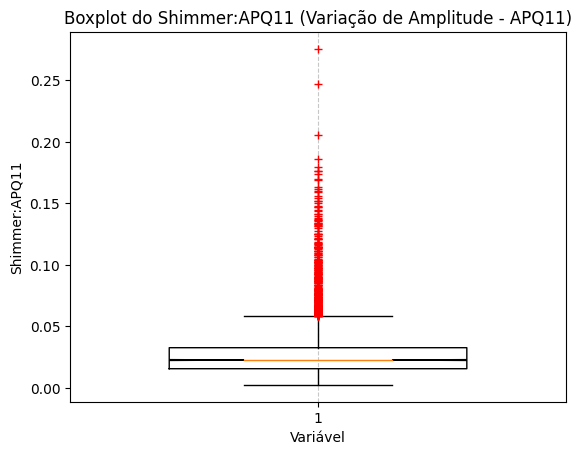

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Shimmer:APQ11'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:APQ11 (Variação de Amplitude - APQ11)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:APQ11')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#Shimmer:DDA
O boxplot do Shimmer:DDA revela a distribuição da medida de variação de amplitude. A mediana está centrada na caixa, que representa a maior parte dos valores. O gráfico também indica a presença de alguns valores atípicos (outliers), sugerindo que algumas amostras apresentam variações mais extremas na amplitude da voz.

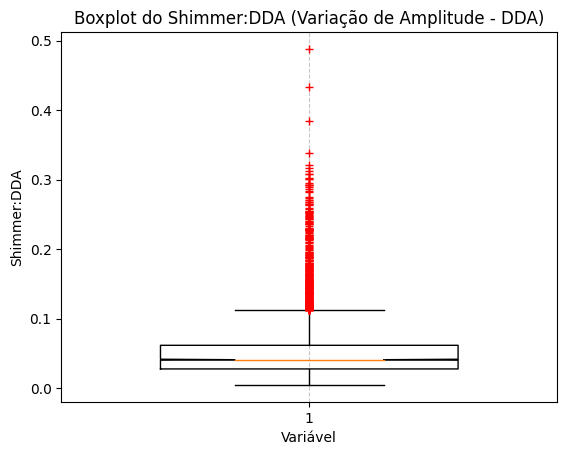

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Shimmer:DDA'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do Shimmer:DDA (Variação de Amplitude - DDA)')
plt.xlabel('Variável')
plt.ylabel('Shimmer:DDA')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#NHR
O boxplot do NHR destaca a distribuição da relação entre ruído e componentes tonais na voz. A mediana está centrada na caixa, indicando onde a maioria dos valores se concentra. O boxplot também sugere a presença de valores atípicos, o que implica que algumas amostras possuem uma relação mais alta entre ruído e componentes tonais.

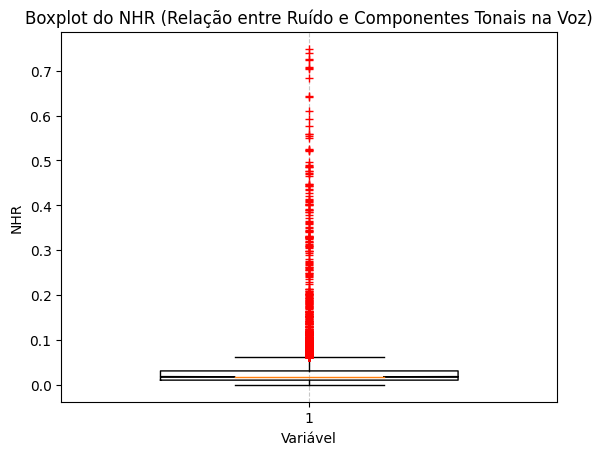

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['NHR'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do NHR (Relação entre Ruído e Componentes Tonais na Voz)')
plt.xlabel('Variável')
plt.ylabel('NHR')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#HNR
O boxplot do HNR mostra a distribuição da medida de relação harmônico-ruído. A mediana está no centro da caixa, representando a maior parte dos valores. Há evidência clara de valores atípicos no boxplot, indicando que a maioria das amostras não possui uma relação harmônico-ruído consistente.

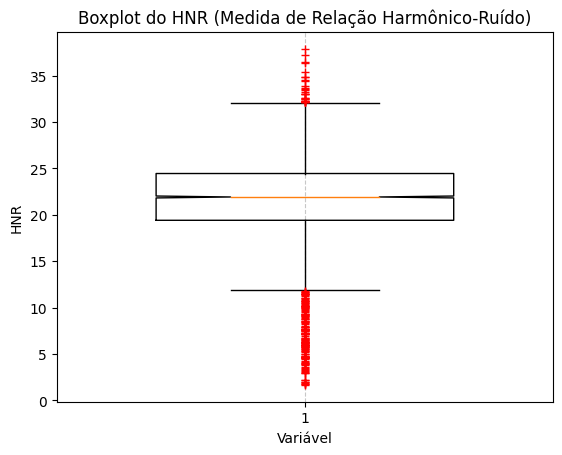

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['HNR'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do HNR (Medida de Relação Harmônico-Ruído)')
plt.xlabel('Variável')
plt.ylabel('HNR')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#RPDE
O boxplot do RPDE representa a distribuição da medida de complexidade dinâmica não linear. A mediana está centrada na caixa, indicando a concentração da maioria dos valores. O boxplot mostra poucos valores atípicos significativos, sugerindo que a medida de complexidade é relativamente consistente nas amostras.

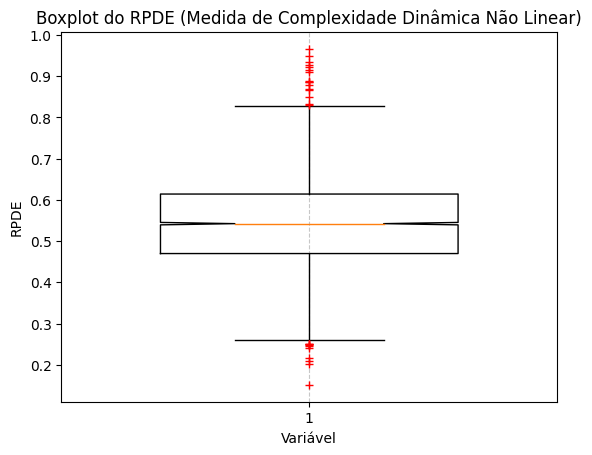

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['RPDE'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do RPDE (Medida de Complexidade Dinâmica Não Linear)')
plt.xlabel('Variável')
plt.ylabel('RPDE')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

 # DFA
 O boxplot do DFA destaca a distribuição da medida de expoente de escala fractal do sinal. A mediana está no centro da caixa, representando a maioria dos valores. Não há evidência clara de valores atípicos, sugerindo que a medida de escala fractal é consistente nas amostras.

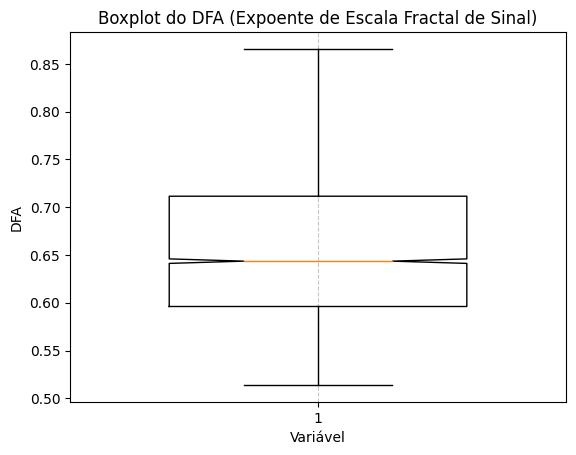

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['DFA'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do DFA (Expoente de Escala Fractal de Sinal)')
plt.xlabel('Variável')
plt.ylabel('DFA')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#PPE
O boxplot do PPE mostra a distribuição da medida não linear da variação da frequência fundamental. A mediana está centrada na caixa, indicando onde a maioria dos valores se concentra. O boxplot sugere a presença de valores atípicos, indicando que algumas amostras apresentam variações mais extremas na frequência fundamental em relação ao PPE.

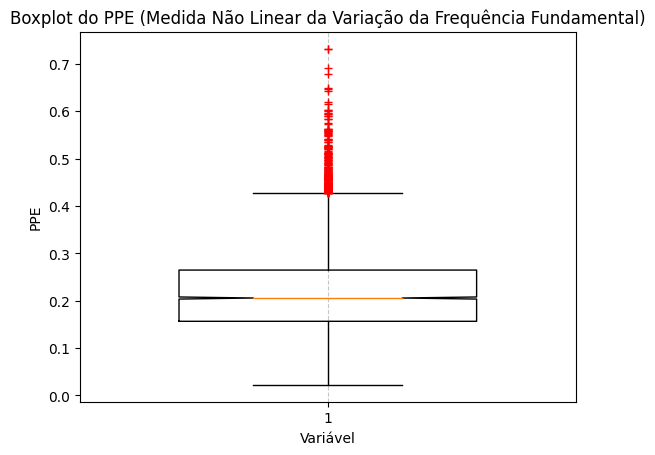

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['PPE'], sym='r+', widths=0.6, notch=True)
plt.title('Boxplot do PPE (Medida Não Linear da Variação da Frequência Fundamental)')
plt.xlabel('Variável')
plt.ylabel('PPE')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# IDENTIFICANDO OUTLIERS


Dando continuidade, utilizaremos o método estatístico IQR (Intervalo interquartil) para realizar a identificação de outliers nas colunas propostas para análise. A começar pela coluna 'test_time'

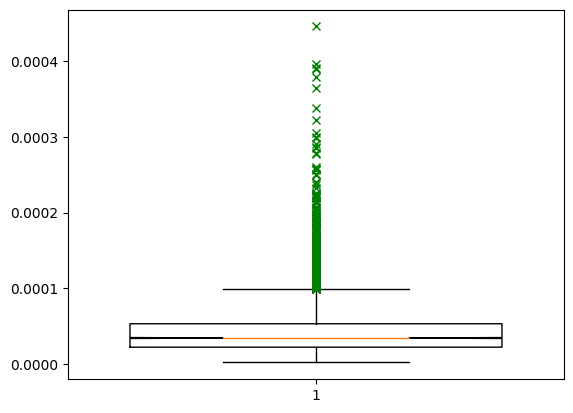

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(df['Jitter(Abs)'], sym='gx', widths=.75, notch=True)
plt.show()
